In [0]:
import pandas as pd
data = pd.read_csv('/content/sample_data/Fremont_Bridge_Hourly_Bicycle_Counts.csv', index_col='Date', parse_dates=True)
data.head

<bound method NDFrame.head of                      Fremont Bridge East Sidewalk  Fremont Bridge West Sidewalk
Date                                                                           
2019-01-01 00:00:00                           0.0                           9.0
2019-01-01 01:00:00                           2.0                          22.0
2019-01-01 02:00:00                           1.0                          11.0
2019-01-01 03:00:00                           1.0                           2.0
2019-01-01 04:00:00                           2.0                           1.0
...                                           ...                           ...
2016-02-29 00:00:00                           2.0                           2.0
2013-09-13 03:00:00                           1.0                           1.0
2016-12-07 00:00:00                           3.0                           3.0
2013-03-29 04:00:00                           1.0                           1.0
2017-05-24

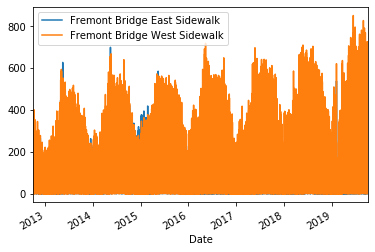

In [0]:
%matplotlib inline
data.plot()

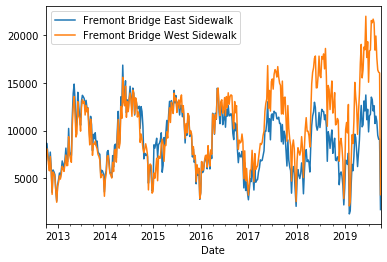

In [0]:
# 数据重采样，按周进行计算
%matplotlib inline
data.resample('w').sum().plot()

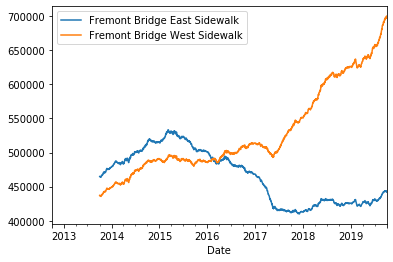

In [0]:
# 以365天为一个滑动窗口
data.resample('D').sum().rolling(365).sum().plot()

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]), <a list of 10 Text xticklabel objects>)

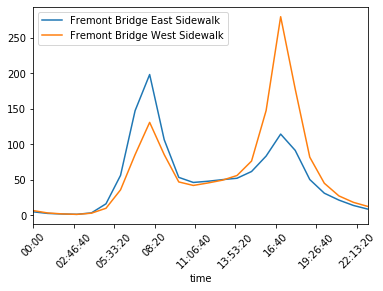

In [0]:
import matplotlib.pyplot as plt
data.groupby(data.index.time).mean().plot()
plt.xticks(rotation=45)

In [0]:
# pivot table：数据透视表
data.columns = ['Total','Date','Weast','East']
data['Total'] = data['Weast']+data['East']
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]   # 只显示5行5列

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,35.0,47.0,29.0,37.0,27.0
01:00:00,26.0,6.0,20.0,35.0,39.0
02:00:00,5.0,24.0,17.0,20.0,7.0
03:00:00,13.0,9.0,10.0,8.0,14.0
04:00:00,15.0,17.0,20.0,11.0,8.0


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]), <a list of 10 Text xticklabel objects>)

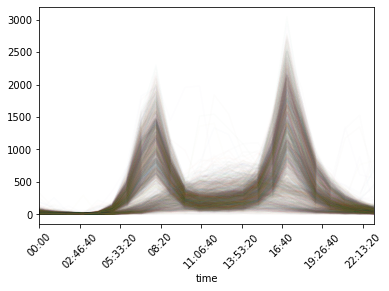

In [0]:
pivoted.plot(legend=False, alpha=0.01)
plt.xticks(rotation=45)
# 这里有2中隐藏的高斯分布

In [0]:
pivoted.shape

(24, 2554)

In [0]:
X = pivoted.fillna(0).T.values
X.shape

(2554, 24)

In [0]:
from sklearn.decomposition import PCA
x2 = PCA(2).fit_transform(X)
x2.shape

(2554, 2)

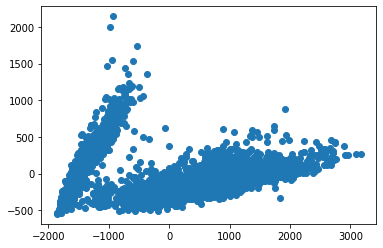

In [0]:
# 画出散点图
plt.scatter(x2[:,0], x2[:,1])

In [0]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2) #有2种隐藏的高斯分布
gmm.fit(X)
# 算出每个样本属于每个高斯模型的概率
labels = gmm.predict_proba(X)
labels

array([[9.32753286e-154, 1.00000000e+000],
       [2.12193132e-119, 1.00000000e+000],
       [1.97118988e-090, 1.00000000e+000],
       ...,
       [1.00000000e+000, 5.95677905e-011],
       [1.00000000e+000, 2.54270067e-016],
       [0.00000000e+000, 1.00000000e+000]])

In [33]:
# 算出每个样本属于哪个高斯模型
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 0, 0, 1])

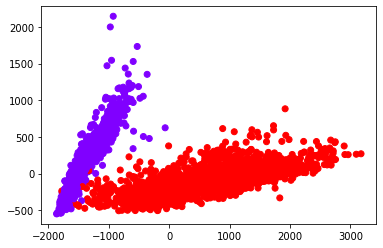

In [42]:
plt.scatter(x2[:,0], x2[:,1], c=labels, cmap='rainbow')

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]), <a list of 10 Text xticklabel objects>)

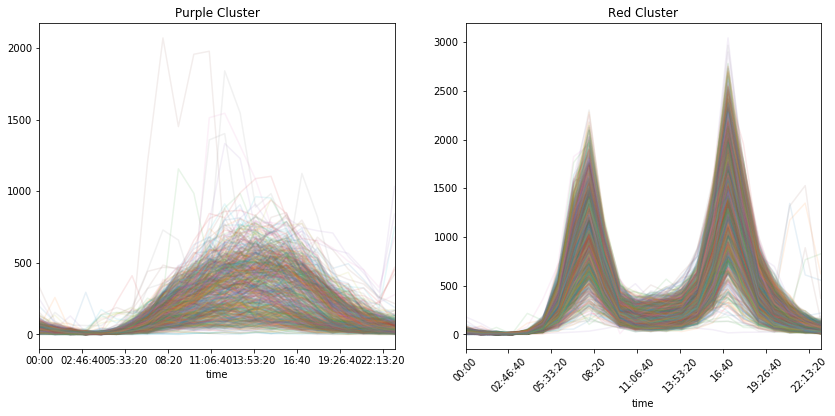

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0])
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1])

ax[0].set_title('Purple Cluster')
# plt.xticks(rotation=45)
ax[1].set_title('Red Cluster')
plt.xticks(rotation=45)

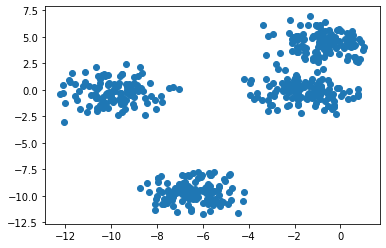

In [38]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=500, centers=4, random_state=11)
plt.scatter(X[:,0], X[:,1])

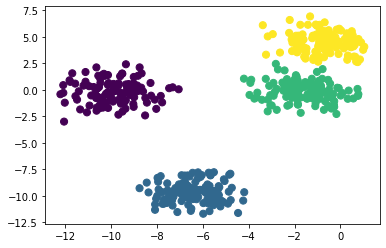

In [41]:
# 对上述生成的点，使用kmeans和gmm聚类，观察差异
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1] , c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_

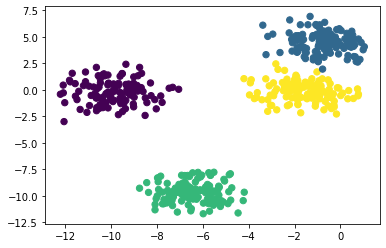

In [43]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, s=40, cmap='viridis')

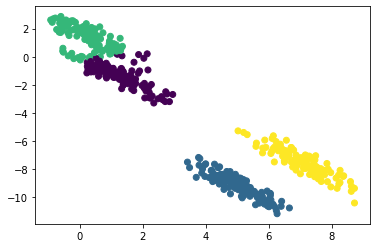

In [48]:
# 对数据稍微进行改变
import numpy as np
rng = np.random.RandomState(13)
# 矩阵乘法,加入了均匀噪声
X_stretched = np.dot(X, rng.randn(2,2))

kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(X_stretched)
y_kmeans = kmeans.predict(X_stretched)
plt.scatter(X_stretched[:,0], X_stretched[:,1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_

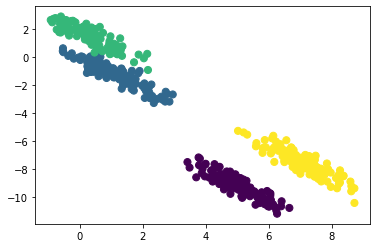

In [51]:
# 使用gmm
gmm = GaussianMixture(n_components = 4)
gmm.fit(X_stretched)
y_gmm = gmm.predict(X_stretched)
plt.scatter(X_stretched[:,0], X_stretched[:,1], c=y_gmm, s=50, cmap='viridis')
# 效果更好